In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("train.csv")



In [2]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# data = np.array(data)
# m, n = data.shape

# data_dev = data[:1000].T
# Y_dev = data_dev[0]
# X_dev = data_dev[1:n]

# data_train = data[1000:m].T
# Y_train = data_train[0]
# X_train = data_train[1:n]

# np.unique(X_train[0])

data = pd.read_csv("train.csv")
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [4]:
def init_params():
    # number of neurons times number of input features (input layer)
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    # number of neurons times number of outputs from the previous layer
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    return W1, b1, W2, b2


def ReLU(Z):
    # Element-wise
    return np.maximum(0, Z)


def softmax(Z):
    # Every element in Z is going to be divided by the sum of that element's column.
    # A = np.exp(Z) / np.sum(np.exp(Z))
    A = np.exp(Z) / sum(np.exp(Z))


    return A


def ReLU_derivative(z):
    # Derivative (slope) of any constant is 0 => return 0 if X <= 0 (Because the function of ReLU is a constant, 0, if X is less than or equal to 0)
    # If X > 0, ReLU returns an identity function; the slope of an identity function is 1.
    # False in float is 0; True in float is 1.
    return (z > 0).astype(float)


def forward_prop(W1, b1, W2, b2, X):
    # Z1 is a layer of 10 neurons
    # X (transposed) is a matrix where every column is an intensity of every pixel of a given example

    # W1: (10, 784); X: (784, 41000). Z1: (10, 41000). b1: (10, 1)
    # first row of W1 * first column of X (a row of W1 consists of 784 elements: every element is multiplied by the respective element of X's column, which also consists of 784 elements)
    # first row of W1 * second column of X
    # first row of W1 * third column of X
    # ...
    # first row of W1 * 41000th column of X (that makes up the first row of Z1; it's the first row of W1 multiplied by every column of Z1) (so, every element of Z1 is a sum of 784 elements of W1's first row * 784 elements of X's given column)
    # repeat the same until last row of W1, the 10th row
    # so, every element in the last, 10th row of Z1 is a sum of W1's 10th row * given column of Z1

    # so, the element at the first row, first column of Z1 is a sum of the multiplication of the first weight vector (because every pixel has its own weight) times every pixel of the first example.
    # the element at the first row, second column, is a sum of the multiplication of the first weight vector (because every pixel has its own weight) times every pixel of the second example.

    # In other words, Z[0, 0] is the sum of a vector of weights of a first neuron times the pixels of a first example.


    # Each column in Z1 is a set of pre-activation outputs (scores) for all 10 neurons for a single input example

    # For each example:
    # - Each neuron computes a weighted sum of all 784 pixel values
    # - This score is stored in Z1[i, j]

    # Note: every pixel contributes to 10 neurons, and each neuron has a weight for every pixel.
    # so, there is a weight for every neuron for every pixel

    Z1 = W1.dot(X) + b1

    # Replace all negative values with zeros
    # A1: (10, 41000)
    A1 = ReLU(Z1)

    # W2: (10, 10); A1: (10, 41000); Z2: (10, 41000). b2: (10, 1)

    # Every element in Z2 is a multiplication of a given W2's row times a given column of A1.
    # In other words, Z2[0, 0] is a sum of multiplication of the first neuron's 10 weights times the first column of A1, which, in turn, is a column of values of neurons for Z1 after applying the A1 or the ReLU function in this case.
    Z2 = W2.dot(A1) + b2

    # A2: (10, 41000)
    # Every column is the confidence of neurons that the number (output) is theirs for a given example.
    A2 = softmax(Z2)

    return Z1, A1, Z2, A2


# Y: (m, 1)
def one_hot(Y):
    # one_hot_Y: (m, 10) 
    # 10 in this case because max of Y is 9 (the greatest digit). (we need 10 columns because there are 10 digits)
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))

    # Y.size specifies which row it's accessing; Y specifies which column it's accessing.
    # Iterating over every example using Y.size, and then class label Y as an index, we set the correct class to 1.
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T

    return one_hot_Y


def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    # Subtraction of actual labels from predictions (for a given example, actual labels are going to be a (10,) column of 9 zeros and 1 one. Predictions are going to be floats.)

    # dZ2 is the gradient of the loss with respect to Z2 (the logits). This follows from the derivative of the softmax + cross-entropy loss.
    dZ2 = A2 - one_hot_Y

    # dZ2: (10, 41000); A1.T: (41000, 10); dW2: (10, 10)
    # dW2[0][0]: derivative of first weight of first neuron. 
    # derivative of dW2[0][0] is error of 2nd layer's first neuron for first example times value of 1st layer's first neuron after activation for first example

    # Error of every element times the value of that element in A1 divided by m examples 
    # Shows how much every element contributed to the error and then is used to subtract that value from W2.

    # This computes how the loss changes w.r.t. W2.
    # A1: the input to the output layer
    # dZ2: the error at the output

    # dW2[i][j] shows how much changing the jth activation of the hidden layer affects the ith output neuron’s loss, averaged over all examples.
    dW2 = (1 / m) * dZ2.dot(A1.T)

    # For every neuron, there is one b.
    # Sum the error of every example for a given neuron and then divide the sum by the number of examples
    # In other words, db2 is a vector of mean derivatives for every neuron.

    # db2 is the average gradient of the loss with respect to the bias of each output neuron.
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)

    # If W2 is a matrix of weights of neurons, where every row is the 10 weights of a given neuron,
    # then W2.T is a matrix consisting of rows where each row is the value of a given weight for every of the 10 neurons.
    # However, why do we transpose it in the first place? W2.T maps the error back from the output to the hidden layer.
    # The transpose is needed because you’re reversing the forward path (where Z2 = W2 · A1) in backprop.

    # W2: (10, 10); dZ2: (10, 41000); dZ1: (10, 41000)

    # W2.T.dot(dZ2) is a matrix where every element is a sum of how much a given vector of neurons' weights contributed to the error
    # W2.T.dot(dZ2)[0][0] - sum of multiplication of the first weight of neurons times the error of every neuron for the first example

    # If the value of a given element in Z1 was <= 0, then it didn't contribute to the error because ReLU made it 0.
    # If the value of a given element in Z1 was > 0, then keep the value as it is. (because the derivative will then be 1, which means that if you multiply it by the derivative, the value will stay the same.)
    dZ1 = W2.T.dot(dZ2) * ReLU_derivative(Z1)

    
                        # basically X.T.T here
    # dZ1: (10, 41000); X.T(41000, 784); dW1: (10, 784)

    # dW1[0][0] - sum of the multiplication of 
    #                                       (sum of first weight of every neuron times the error of every neuron for every example)
    #                                       and
    #                                       (the value of the first pixel for every example)
    #  and then divided by m
    dW1 = (1 / m) * dZ1.dot(X.T)

    # Every row is a sum of a given neuron's errors for every example which is divided by the total number of examples. Or in other words,
    # Mean of errors of every neuron for first layer
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2

    return W1, b1, W2, b2

# Questions
# How did we get to the softmax derivative and what is cross-entropy loss
# I made a mistake regarding dW2. It should be dW2 = (1 / m) * dZ2.dot(A1.T). Can you explain what it does again and in details?
# How did we get the derivative of dW2. Why does it work? 
 

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        # print(f"b1 shape after update params: {b1.shape}")
        # if i % 50 == 0:
        if i % 50 == 0:
            print(f"Iteration: {i}")
            print(f"Accuracy: {get_accuracy(get_predictions(A2), Y)}")

    return W1, b1, W2, b2
    
    

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration: 0
[1 1 1 ... 1 1 1] [4 9 2 ... 8 8 0]
Accuracy: 0.08760975609756097
Iteration: 50
[4 9 1 ... 8 8 8] [4 9 2 ... 8 8 0]
Accuracy: 0.576170731707317
Iteration: 100
[4 9 8 ... 5 8 8] [4 9 2 ... 8 8 0]
Accuracy: 0.6912439024390243
Iteration: 150
[4 9 8 ... 5 8 0] [4 9 2 ... 8 8 0]
Accuracy: 0.7405121951219512
Iteration: 200
[4 9 8 ... 5 8 0] [4 9 2 ... 8 8 0]
Accuracy: 0.7718780487804878
Iteration: 250
[4 9 8 ... 5 8 0] [4 9 2 ... 8 8 0]
Accuracy: 0.7947073170731708
Iteration: 300
[4 9 8 ... 5 8 0] [4 9 2 ... 8 8 0]
Accuracy: 0.8121463414634147
Iteration: 350
[4 9 8 ... 5 8 0] [4 9 2 ... 8 8 0]
Accuracy: 0.825560975609756
Iteration: 400
[4 9 8 ... 5 8 0] [4 9 2 ... 8 8 0]
Accuracy: 0.8355609756097561
Iteration: 450
[4 9 8 ... 5 8 0] [4 9 2 ... 8 8 0]
Accuracy: 0.8440975609756097


In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]

    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation="nearest")
    plt.show()

Prediction:  [8]
Label:  8


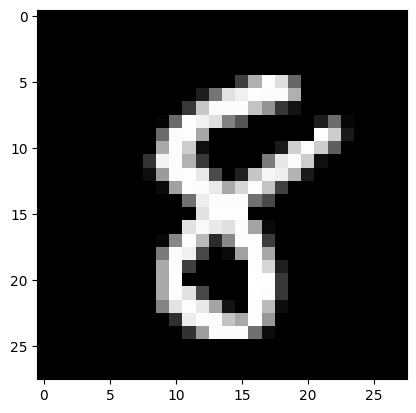

In [8]:
test_prediction(11, W1, b1, W2, b2)

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[5 2 2 3 7 5 9 1 2 4 0 1 8 1 8 8 0 2 6 8 3 0 8 0 7 8 9 3 1 5 1 2 1 3 4 6 5
 2 6 5 5 9 7 7 5 4 1 4 4 4 9 6 3 5 0 7 8 2 3 9 7 9 8 9 7 7 3 0 6 2 8 5 0 9
 4 9 8 8 8 9 3 4 5 4 9 0 4 8 7 1 1 2 2 3 6 9 9 3 4 5 2 8 2 0 4 6 9 7 7 7 2
 9 9 7 9 0 3 9 3 7 0 7 2 1 8 3 6 5 4 9 7 9 1 6 8 8 4 3 4 3 2 3 9 5 3 1 1 8
 8 7 6 5 8 3 9 6 1 4 1 6 2 0 8 6 3 7 6 9 2 7 0 7 0 2 7 1 2 3 3 0 2 0 8 1 1
 9 6 6 1 1 2 6 5 1 1 8 6 7 1 5 5 2 7 9 8 7 9 0 2 7 7 7 7 1 6 2 7 6 6 1 3 8
 3 3 0 7 1 3 9 2 5 2 0 6 9 6 7 0 4 2 1 2 2 2 6 9 6 0 7 3 5 6 0 9 8 2 3 2 1
 5 4 8 1 3 1 7 9 0 2 4 2 8 8 8 6 3 3 8 8 8 7 6 0 4 5 7 3 5 5 9 6 8 5 4 2 3
 2 4 8 3 2 7 8 6 6 5 1 3 3 4 3 7 8 7 1 9 8 5 0 6 1 1 5 9 9 0 3 9 5 4 4 2 4
 6 3 8 1 6 3 9 6 3 0 3 7 4 9 3 6 9 3 8 1 9 1 0 7 0 6 7 7 1 6 5 8 1 9 9 4 7
 6 1 2 2 8 0 0 8 5 6 8 3 6 6 4 4 2 4 6 5 6 6 3 1 5 6 9 2 6 9 0 2 6 0 4 6 2
 2 1 1 4 2 4 4 2 0 9 0 7 1 6 0 9 2 0 5 7 6 9 2 8 5 6 6 6 0 3 7 6 9 5 0 2 8
 7 7 7 2 1 1 4 3 8 5 9 1 6 4 1 2 2 2 0 7 2 1 4 0 7 2 7 2 4 6 3 7 1 5 6 0 6
 7 1 1 0 9 5 1 6 0 9 9 1 

np.float64(0.854)